# Homework 1 - Anomaly Detection Challenges 2016/2017
### Miguel Sandim

In [1]:
# Configurations
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

np.random.seed(42)
%matplotlib inline

# From: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 0. Loading the data and transforming it into a pandas dataframe:

In [2]:
# Load the data
import scipy.io
data_mat = scipy.io.loadmat("data/oc_514.mat")

In [3]:
type(data_mat['x'])

scipy.io.matlab.mio5_params.MatlabObject

In [4]:
data_mat = data_mat['x'][0,0]

In [5]:
#for i,x in enumerate(data_mat):
#    print(i)
#    print(type(x))
#    print(x)
#    print("**************************************************************************")

### For what I understood this structure has the following contents:
- Index 0 has the features' values
- Index 2 has the class values for each instance
- Index 5 has the features' names

In [6]:
dataset = pd.DataFrame(np.hstack((data_mat[0],data_mat[2])), columns = np.append([x.strip() for x in data_mat[5]], ["class"]))

In [7]:
dataset["class"] = dataset["class"].astype("category")
dataset["class"].cat.rename_categories(["anomaly", "ok"], inplace = True)

In [8]:
dataset.head()

,age,sex,height,weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,V6-Q wave ampl,V6-R wave ampl,V6-S wave ampl,V6-R' wave ampl,V6-S' wave ampl,V6-P wave ampl,V6-T wave ampl,V6-QRSA sum,V6-QRSTA,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,anomaly
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,anomaly
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,anomaly
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,ok
4,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,anomaly


In [9]:
dataset.describe()

,age,sex,height,weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,V6-JJ wave ampl,V6-Q wave ampl,V6-R wave ampl,V6-S wave ampl,V6-R' wave ampl,V6-S' wave ampl,V6-P wave ampl,V6-T wave ampl,V6-QRSA sum,V6-QRSTA
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,...,420.000000,420.000000,420.000000,420.000000,420.000000,420.0,420.000000,420.000000,420.000000,420.000000
mean,46.050000,0.559524,166.159524,67.657143,88.900000,158.935714,367.559524,170.166667,91.876190,33.273810,...,-0.282381,-0.274762,9.022619,-1.487143,0.003095,0.0,0.544286,1.270952,19.109524,29.618333
std,16.387168,0.497036,38.496515,16.633967,15.651774,36.612571,33.129078,35.837885,21.822541,46.094422,...,0.606901,0.530125,3.452782,2.046704,0.045984,0.0,0.323009,1.410061,13.651475,18.584817
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,111.000000,0.000000,-172.000000,...,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,143.000000,350.000000,148.000000,79.750000,2.750000,...,-0.500000,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.600000,11.100000,17.750000
50%,46.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.500000,162.500000,91.000000,40.000000,...,-0.200000,0.000000,8.700000,-1.200000,0.000000,0.0,0.500000,1.400000,18.000000,28.100000
75%,58.000000,1.000000,170.000000,78.000000,94.000000,174.000000,384.000000,178.000000,102.000000,66.000000,...,0.000000,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.800000,41.225000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000


### 2.0 is a normal occurance, 1.0 is an anomaly

In [10]:
dataset["class"].value_counts()

ok         237
anomaly    183
Name: class, dtype: int64

### The features we have:

In [11]:
dataset.columns.tolist()

['age',
 'sex',
 'height',
 'weight',
 'QRS duration',
 'P-R interval',
 'Q-T interval',
 'T interval',
 'P interval',
 'QRS',
 'T',
 'P',
 'QRST',
 'heartrate',
 'DI-Q wave width',
 'DI-R wave width',
 'DI-S wave width',
 "DI-R' wave width",
 "DI-S' wave width",
 'DI-number of intrinsic deflections',
 'DI-ragged R wave',
 'DI-diphasic derivation of R wave',
 'DI-ragged P wave',
 'DI-diphasic derivation of P wave',
 'DI-ragged T wave',
 'DI-diphasic derivation of T wave',
 'DII-Q wave width',
 'DII-R wave width',
 'DII-S wave width',
 "DII-R' wave width",
 "DII-S' wave width",
 'DII-number of intrinsic deflections',
 'DII-ragged R wave',
 'DII-diphasic derivation of R wave',
 'DII-ragged P wave',
 'DII-diphasic derivation of P wave',
 'DII-ragged T wave',
 'DII-diphasic derivation of T wave',
 'DIII-Q wave width',
 'DIII-R wave width',
 'DIII-S wave width',
 "DIII-R' wave width",
 "DIII-S' wave width",
 'DIII-number of intrinsic deflections',
 'DIII-ragged R wave',
 'DIII-diphasic deri

### Spliting the data for training and test:

In [12]:
from sklearn.model_selection import train_test_split

X = dataset.ix[:,:278]
y = dataset.ix[:,278]

X_train, X_test, y_train, y_test = train_test_split(dataset.ix[:,:278], dataset.ix[:,278], test_size=0.3, random_state=0)
X_train_ok = X_train[y_train != "anomaly"]

print("X: %s Y: %s" % (X.shape, y.shape))

print("Train X: %s Y: %s" % (X_train.shape, y_train.shape))
print("Test X: %s Y: %s" % (X_test.shape, y_test.shape))

print("\nTraining set anomalies:\n%s" % y_train.value_counts())
print("\nTest set anomalies:\n%s" % y_test.value_counts())

X: (420, 278) Y: (420,)
Train X: (294, 278) Y: (294,)
Test X: (126, 278) Y: (126,)

Training set anomalies:
anomaly    133
ok         161
dtype: int64

Test set anomalies:
anomaly    50
ok         76
dtype: int64


### 1) KDE
#### Methodology:
- Train with the non-anomalous instances
- Test with anomalous/non-anomalous instances

In [13]:
from sklearn.neighbors.kde import KernelDensity
from sklearn.model_selection import GridSearchCV

In [14]:

#hist = KernelDensity(kernel = "guassian", brandwith = 0.1)
model = KernelDensity(kernel = "gaussian", bandwidth = 1.8)

#model_parameters =  [{"bandwidth": np.arange(0.3, 10, 0.3)}]
#model2 = GridSearchCV(model, model_parameters, cv=10)
#model2.fit(X_train)
#probs = np.exp(model2.best_estimator_.score_samples(X_test))
#probs = model2.best_estimator_.score_samples(X_train)
t1 = time.process_time()    

model.fit(X_train_ok)
probs = np.exp(model.score_samples(X_test))

print("Time to train and predict the results: %f" % (time.process_time() - t1))

Time to train and predict the results: 0.046875


In [15]:
np.set_printoptions(precision=24)
print("Probs: %s" % probs)
y_pred = np.array(["anomaly" if y == 0.0 else "ok" for y in probs])

Probs: [  2.346937608928838727442540e-199   0.000000000000000000000000e+000
   0.000000000000000000000000e+000   0.000000000000000000000000e+000
   0.000000000000000000000000e+000   0.000000000000000000000000e+000
   1.205205323958764331658514e-198   0.000000000000000000000000e+000
   0.000000000000000000000000e+000   1.932541125792737354131775e-227
   0.000000000000000000000000e+000   5.312139014128970589600247e-232
   0.000000000000000000000000e+000   0.000000000000000000000000e+000
   0.000000000000000000000000e+000   1.736033728288158322853633e-199
   0.000000000000000000000000e+000   0.000000000000000000000000e+000
   0.000000000000000000000000e+000   0.000000000000000000000000e+000
   0.000000000000000000000000e+000   0.000000000000000000000000e+000
   0.000000000000000000000000e+000   0.000000000000000000000000e+000
   0.000000000000000000000000e+000   3.326944820891070881549886e-232
   0.000000000000000000000000e+000   4.463285848082592847985692e-199
   1.5122384490678049559169

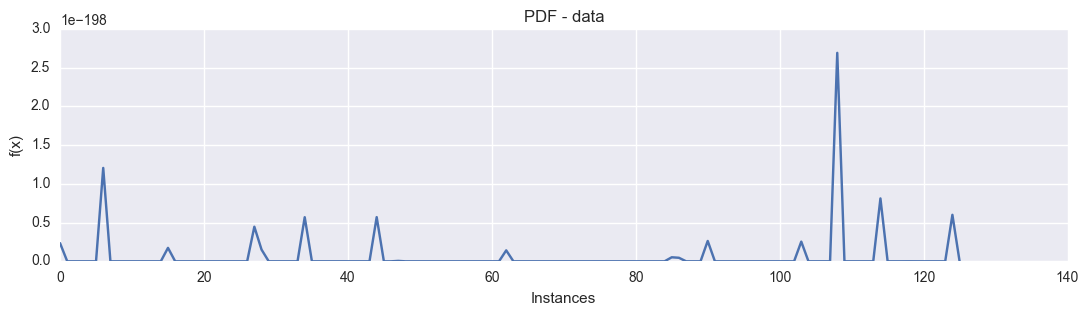

In [16]:
# Plot
plt.figure(figsize=(13, 3), dpi=500)
plt.plot(np.arange(len(probs)), probs)
plt.xlabel('Instances')
plt.ylabel('f(x)')
plt.title('PDF - data')

Confusion matrix, without normalization
[[15 61]
 [11 39]]


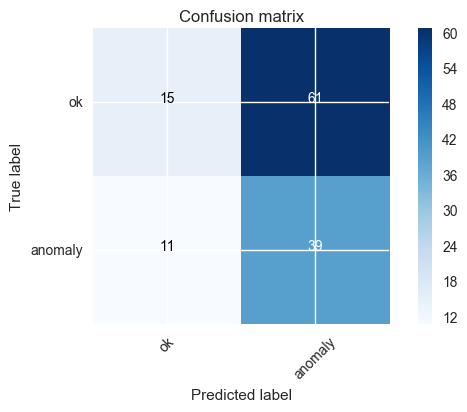

In [17]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred, labels = ["ok", "anomaly"]), classes = ["ok", "anomaly"])

#### Conclusions:
- The algorithm identifies most of the instances in test set as anomalous, since almost all the values give my "score_samples" are zeros. This pattern was observed with every value atributed to "bandwith" parameter.
- Fast execution (only 0.046875 seconds to train and predict the results)

### 2) One-class SVM
#### Methodology:
- Train with the non-anomalous instances
- Test with anomalous/non-anomalous instances

In [18]:
from sklearn import svm

In [19]:
model = svm.OneClassSVM(kernel="linear")

t1 = time.process_time()

model.fit(X_train_ok)
y_pred = np.array(["anomaly" if y == 1 else "ok" for y in model.predict(X_test)])

print("Time to train and predict the results: %f" % (time.process_time() - t1))

Time to train and predict the results: 0.015625


Confusion matrix, without normalization
[[36 40]
 [20 30]]


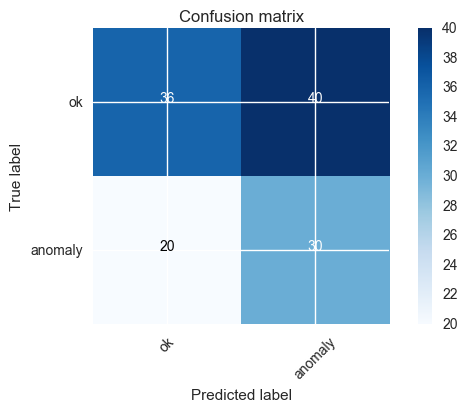

In [20]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred, labels = ["ok", "anomaly"]), classes = ["ok", "anomaly"])

#### Conclusions:
- This alorithm does slightly better, although identifying most non-anomalous instances as anomalous.
- Fast execution (only 0.015625 seconds -- approx. 1/4 of the time for the KDE)

### 3) LOF
#### Methodology:
- Train with the non-anomalous instances
- Test with anomalous/non-anomalous instances

In [21]:
from sklearn.neighbors import NearestNeighbors
import scipy.spatial.distance as scidi 

class LOF:
    def __init__(self, train_data, k):
        self.train_data = train_data
        self.nearest_neighbors = NearestNeighbors(n_neighbors = k, metric = "euclidean")
        
        # Fit the training data to find neighbors:
        self.nearest_neighbors.fit(train_data)
    
    # Calculates the KNN of a row "a"
    def __neighbors(self, a):
        return_value = self.nearest_neighbors.kneighbors([a])
        return(return_value)
    
    # Calculates the number of neighbors of a row "a"
    def __number_of_neighbors(self, a):
        return(len(self.__neighbors(a)[0][0]))
    
    # Calculates the k-distance of a row "a"
    def __k_distance(self, a):
        distances, indexes = self.__neighbors(a)
        return(max(distances[0]))
    
    # Calculates the reachability distance between rows "a" and "b"
    def __reachability_distance(self, a, b):
        return(max([self.__k_distance(b), scidi.euclidean(a, b)]))
    
    # Calculates the local reachability function for row "a"
    def __lrd(self, a):
        neighbors_distances, neighbors_indexes = self.__neighbors(a)
        
        numerator = sum([self.__reachability_distance(a, b) for b in self.train_data.iloc[neighbors_indexes[0],:].values])
        denominator =  self.__number_of_neighbors(a)
        
        return(1/(numerator/denominator))
    
    # Calculates the LOF for a row "a"
    def __lof(self, a):
        neighbors_distances, neighbors_indexes = self.__neighbors(a)
        
        numerator = sum([(self.__lrd(b) / self.__lrd(a)) for b in self.train_data.iloc[neighbors_indexes[0], :].values])
        denominator = self.__number_of_neighbors(a)
        
        return(numerator/denominator)
    
    # Predicts the LOFs for the rows in "test_data"
    def predict(self, test_data):
        lofs = [self.__lof(x) for _, x in test_data.iterrows()]
        return(lofs)

In [22]:
t1 = time.process_time()
model = LOF(X_train_ok, 5)

In [23]:
lofs = model.predict(X_test)
print("Time to train and predict the results: %f" % (time.process_time() - t1))

Time to train and predict the results: 5.968750


In [24]:
y_pred = np.array(["anomaly" if y > 1.2 else "ok" for y in lofs])

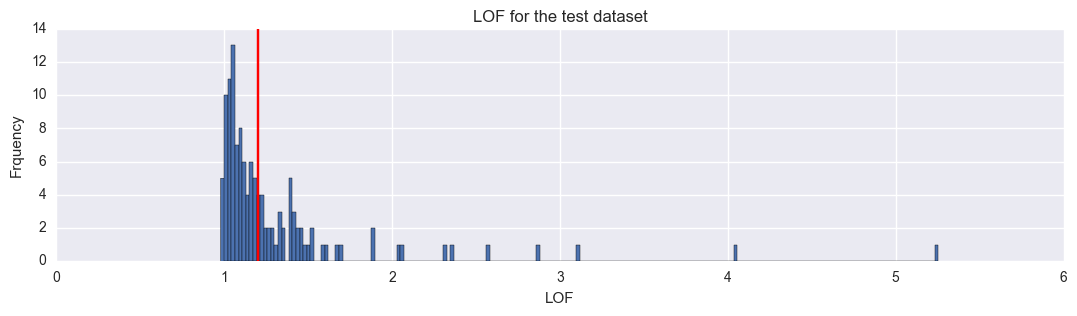

In [25]:
plt.figure(figsize=(13, 3), dpi=500)
plt.hist(lofs, 200)
plt.axvline(1.2, color="r")
plt.xlabel('LOF')
plt.ylabel('Frquency')
plt.title('LOF for the test dataset')

Confusion matrix, without normalization
[[56 20]
 [22 28]]


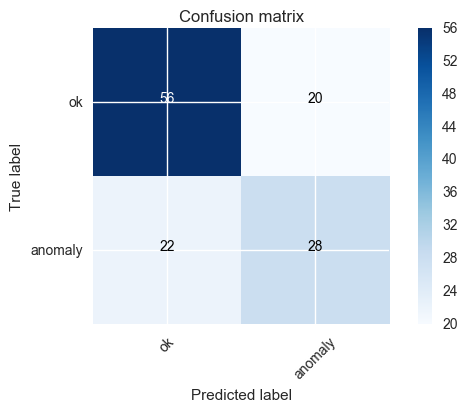

In [26]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred, labels = ["ok", "anomaly"]), classes = ["ok", "anomaly"])

#### Conclusions:
- This alorithm worked the best with this dataset, identifying more than half of the anomalies in the test set, while classifying almost all non-anomalous instances correctly.
- The slowest algorithm (with k=5 it took almost 6 seconds!)